In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def gaussian_kernel(y1, y2, β1, β2):
    return np.exp(-np.linalg.norm(y1 - y2)**2 / (β1 * β2))

In [3]:
def compute_β(V, y, M):
    assert M <= len(V), "M must be at most len(V)"
    norm_list = [np.linalg.norm(vi-y) for vi in V]
    norm_list.sort()
    return np.sum(norm_list[:M]) / M

In [4]:
def compute_similarity_matrix(similarity_function="gaussian", **kw_args):
    if similarity_function=="gaussian":
        V, M = kw_args["compute_β"]
        N = len(V)
        res = np.zeros((N, N))
        for i in range(N):
            for j in range(i+1, N):
                βi = compute_β(V, V[i], M)
                βj = compute_β(V, V[j], M)
                loc_value = gaussian_kernel(V[i], V[j], βi, βj)
                res[i, j] = loc_value
                res[j, i] = loc_value
        return res
    else: #p-value
        pass

def compute_D(similarity_matrix):
    return np.diag(np.sum(similarity_matrix, axis=1))

def compute_lagrangian(similarity_function="gaussian", **kw_args):
    S = compute_similarity_matrix(similarity_function=similarity_function, **kw_args)
    D = compute_D(S)
    return D - S

def compute_clusters(eigen_threshold, similarity_function="gaussian", **kw_args):
    L = compute_lagrangian(similarity_function=similarity_function, **kw_args)
    val, vec = np.linalg.eig(L)
    U = vec[:, val < eigen_threshold]
    kmeans = KMeans(n_clusters = U.shape[1])
    kmeans.fit(U)
    return kmeans.predict(U)

In [5]:
def observe_rand_circles(ns, *R):
    res = np.zeros((ns, 2))
    for i in range(ns):
        θ = np.random.rand() * 2 * np.pi
        coin_flip = np.random.randint(2)
        r = np.random.choice(R)
        res[i, 0] = r * np.cos(θ)
        res[i, 1] = r * np.sin(θ)
    return res

def observe_smooth_circles(ns, *R):
    nR = len(R)
    thres = ns // nR
    res = np.zeros((thres * nR, 2))
    for i in range(ns):
        
        θ = np.linspace(0, 2*np.pi, thres)
        
        for i in range(thres * nR):
            iR = i//thres
            iθ = i % thres
            res[i, 0] = R[iR] * np.cos(θ[iθ])
            res[i, 1] = R[iR] * np.sin(θ[iθ])
    return res

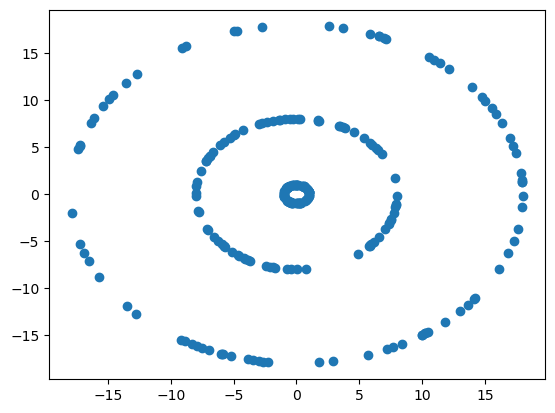

In [6]:
obs = observe_rand_circles(250,1,8, 18)
plt.scatter(obs[:, 0], obs[:, 1])

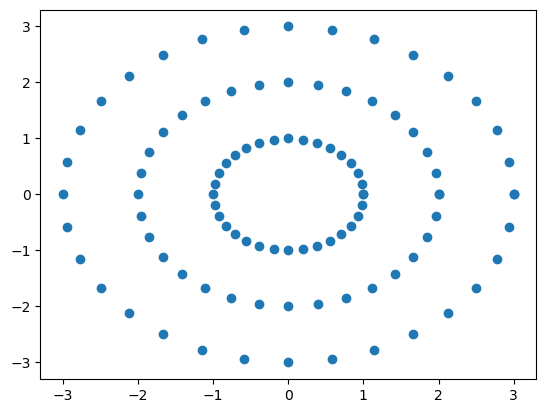

In [7]:
obs = observe_smooth_circles(100,1,2, 3)
plt.scatter(obs[:, 0], obs[:, 1])

In [8]:
kw = {"compute_β":[obs, 3]}
# S = compute_similarity_matrix(**kw)

C:\Users\yannm\.julia\conda\3\x86_64\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yannm\.julia\conda\3\x86_64\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


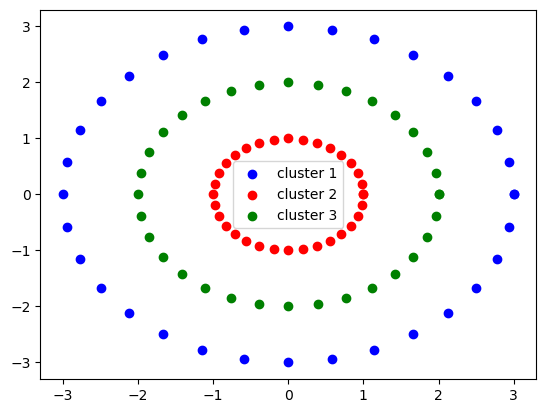

In [9]:
classes_algo = compute_clusters(1 * 10**(-3), **kw)
A1auto = obs[classes_algo==0]
A2auto = obs[classes_algo==1]
A3auto = obs[classes_algo==2]
plt.scatter(A1auto[:, 0], A1auto[:, 1], c="blue", label="cluster 1")
plt.scatter(A2auto[:, 0], A2auto[:, 1], c="red", label="cluster 2")
plt.scatter(A3auto[:, 0], A3auto[:, 1], c="green", label="cluster 3")
plt.legend()